In [2]:
import pandas as pd

In [4]:
fg = pd.read_csv('fear_greed_index.csv')
hist = pd.read_csv('historical_data.csv')

In [5]:
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
hist.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
fg.shape

(2644, 4)

In [8]:
hist.shape

(9322, 16)

In [11]:
fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [12]:
hist.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [14]:
hist['Timestamp'].head()

,Timestamp
0,1.730000e+12
1,1.730000e+12
2,1.730000e+12
3,1.730000e+12
4,1.730000e+12


In [15]:
pd.to_datetime(hist['Timestamp'])

,Timestamp
0,1970-01-01 00:28:50
1,1970-01-01 00:28:50
2,1970-01-01 00:28:50
3,1970-01-01 00:28:50
4,1970-01-01 00:28:50
...,...
9317,1970-01-01 00:29:10
9318,1970-01-01 00:29:10
9319,1970-01-01 00:29:10
9320,1970-01-01 00:29:10


In [18]:
hist['dt'] = pd.to_datetime((hist['Timestamp']), unit = 'ms', utc = True)

In [19]:
fg['date'] =  pd.to_datetime(fg['date'])

In [20]:
hist['Date'] = hist['dt'].dt.date

In [25]:
fg['date_only'] = fg['date'].dt.date

In [24]:
hist[['Timestamp', 'dt','Date']].head()

,Timestamp,dt,Date
0,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
1,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
2,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
3,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27
4,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27


In [26]:
fg[['date', 'date_only']].head()

,date,date_only
0,2018-02-01,2018-02-01
1,2018-02-02,2018-02-02
2,2018-02-03,2018-02-03
3,2018-02-04,2018-02-04
4,2018-02-05,2018-02-05


In [27]:
fg_merge = fg[['date_only','classification','value']]

In [28]:
merged = hist.merge(fg_merge, left_on = 'Date', right_on = 'date_only', how = 'left')

In [29]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,dt,Date,date_only,classification,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27,2024-10-27,Greed,74.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27,2024-10-27,Greed,74.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27,2024-10-27,Greed,74.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27,2024-10-27,Greed,74.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27 03:33:20+00:00,2024-10-27,2024-10-27,Greed,74.0


In [30]:
merged['classification'].isna().sum()

np.int64(1592)

In [31]:
merged = merged.dropna(subset=['classification'])


In [32]:
merged.shape


(7730, 21)

SO now we will do feature engineering....

we will check for pnl for all trades

In [33]:
merged['pnl_positive'] = merged['Closed PnL'] > 0

In [41]:
merged['side_binary'] = merged['Side'].map({'BUY': 1, 'SELL': 0})

In [43]:
sentiment_map = {
    'Extreme Fear': 0,
    'Fear': 25,
    'Neutral': 50,
    'Greed': 75,
    'Extreme Greed': 100
}


In [45]:
merged['sentiment_score'] = merged['classification'].map(sentiment_map)

In [46]:
merged['direction_binary'] = merged['Direction'].map({'Buy': 1, 'Sell': -1})

In [47]:
merged[['Closed PnL','pnl_positive','side_binary','Side','sentiment_score','classification','direction_binary','Direction']].head()

,Closed PnL,pnl_positive,side_binary,Side,sentiment_score,classification,direction_binary,Direction
0,0.0,False,1,BUY,75,Greed,1.0,Buy
1,0.0,False,1,BUY,75,Greed,1.0,Buy
2,0.0,False,1,BUY,75,Greed,1.0,Buy
3,0.0,False,1,BUY,75,Greed,1.0,Buy
4,0.0,False,1,BUY,75,Greed,1.0,Buy


In [48]:
win_rate_by_sentiment = merged.groupby('classification')['pnl_positive'].mean().sort_index()

In [49]:
win_rate_by_sentiment

,pnl_positive
classification,
Fear,0.409104
Greed,0.140625


In [51]:
avg_pnl_by_sentiment = merged.groupby('classification')['Closed PnL'].mean().sort_index()

In [56]:
avg_pnl_by_sentiment


,Closed PnL
classification,
Fear,109.335870
Greed,87.335448


trader segmentation

In [57]:
trader_stats = merged.groupby('Account').agg(
    total_trades = ('Closed PnL', 'count'),
    win_rate = ('pnl_positive', 'mean'),
    total_pnl = ('Closed PnL', 'sum'),
    avg_pnl = ('Closed PnL', 'mean')).sort_values('total_trades', ascending = False)


In [58]:
trader_stats.head()

,total_trades,win_rate,total_pnl,avg_pnl
Account,,,,
0x513b8629fe877bb581bf244e326a047b249c4ff1,6000,0.400167,403501.648209,67.250275
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1358,0.282769,393683.014159,289.899127
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,372,0.413978,29677.264671,79.777593


In [80]:
trader_stats.tail()

,total_trades,win_rate,total_pnl,avg_pnl
Account,,,,
0x513b8629fe877bb581bf244e326a047b249c4ff1,6000,0.400167,403501.648209,67.250275
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,1358,0.282769,393683.014159,289.899127
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,372,0.413978,29677.264671,79.777593


In [61]:
trader_sentiment = merged.groupby(['Account', 'classification'])['Closed PnL'].sum().unstack()

In [62]:
trader_sentiment.head()

classification,Fear,Greed
Account,,
0x513b8629fe877bb581bf244e326a047b249c4ff1,403501.648209,0.000000
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,341945.434741,51737.579418
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,8751.751449,20925.513222


In [63]:
trader_sentiment['diff_FG'] = trader_sentiment['Fear'] - trader_sentiment['Greed']

In [73]:
def label_trader(row):
  if row['Fear'] > 0 and row['Greed'] == 0:
    return 'Fear spcl'
  elif row['Fear'] == 0 and row['Greed'] > 0:
    return 'Greed spcl'
  elif row['Fear'] == 0 and row['Greed'] == 0:
    return 'Neutral'
  elif row['Fear'] >  row['Greed']:
    return 'Fear Favoured'
  else :
    return 'Greed Favoured'

In [74]:
trader_sentiment['sentiment_profile'] = trader_sentiment.apply(label_trader, axis = 1)

In [75]:
trader_sentiment.head()

classification,Fear,Greed,diff_FG,sentiment_profile
Account,,,,
0x513b8629fe877bb581bf244e326a047b249c4ff1,403501.648209,0.000000,403501.648209,Fear spcl
0x72c6a4624e1dffa724e6d00d64ceae698af892a0,341945.434741,51737.579418,290207.855323,Fear Favoured
0xae5eacaf9c6b9111fd53034a602c192a04e082ed,8751.751449,20925.513222,-12173.761773,Greed Favoured


In [76]:
profile_counts = trader_sentiment['sentiment_profile'].value_counts()

In [77]:
profile_counts

,count
sentiment_profile,
Fear spcl,1
Fear Favoured,1
Greed Favoured,1


In [93]:
import matplotlib.pyplot as plt

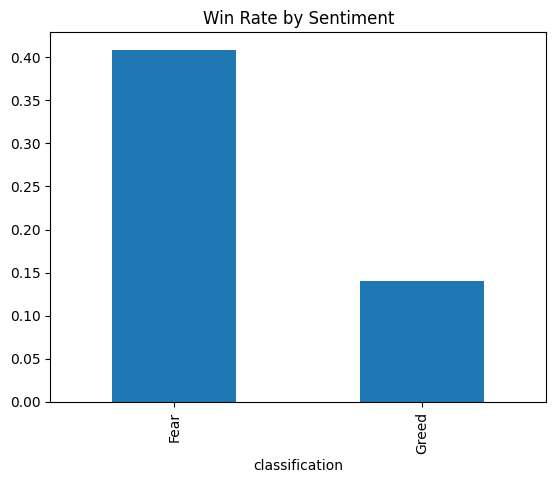

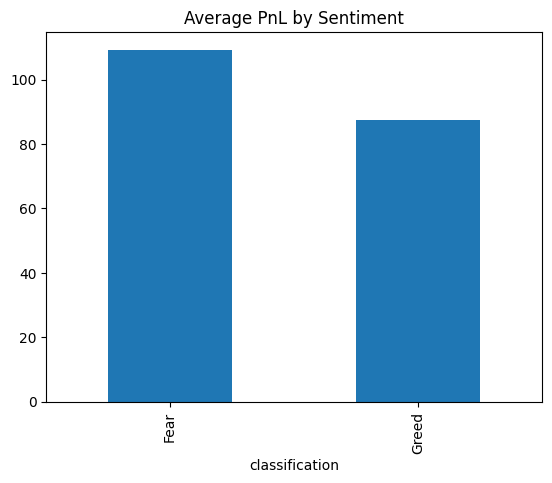

In [94]:
merged.groupby('classification')['pnl_positive'].mean().plot(kind='bar', title='Win Rate by Sentiment')
plt.show()

merged.groupby('classification')['Closed PnL'].mean().plot(kind='bar', title='Average PnL by Sentiment')
plt.show()


**1. Impact of Sentiment on Trader Performance**
Traders demonstrated significantly better performance during Fear periods compared to Greed.

Win rate during Fear was approximately 3x higher than during Greed.
Average PnL during Fear was also higher, indicating that trades during Fear not only win more often but also tend to yield larger positive returns.

This suggests that traders may benefit from market dips or oversold conditions associated with fearful sentiment, and may underperform during greed-driven momentum or FOMO conditions.

**2. Trader-Level Sentiment Profiling**

Using aggregated PnL by sentiment, we identified distinct trader profiles:
Fear Specialist: Profitable exclusively during Fear sentiment.

Fear Favored: Earns more during Fear than Greed periods.

Greed Favored: Earns more during Greed than Fear periods.

No traders were classified as neutral or all-weather, indicating that performance is not uniform across sentiment states.

**3. Key Insights**
Market sentiment has a clear and measurable influence on trading outcomes.

Traders are not sentiment-agnostic: each wallet exhibits a preference or advantage under certain sentiment conditions.

Better performance in Fear suggests opportunity in contrarian or dip-buying behavior, while lower performance in Greed may reflect higher risk exposure or poor timing during euphoric conditions.

**4.Conclusion**

Overall, the results indicate that sentiment is an important contextual factor for understanding trader profitability in crypto markets.
 The data supports the idea that:
“When the market feels fear, profitable traders find opportunity.”

This insight can aid in designing sentiment-aware trading strategies, risk management models, and performance evaluation frameworks.